<a href="https://colab.research.google.com/github/nramelia2/DATA-SCIENTIST/blob/main/11%20CLUSTERING/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Mengimpor dataset
dataset = pd.read_csv('Live.csv')
X = dataset.iloc[:, [1, 11]].values

In [ ]:
# Fitur vector dan target variabel
X = dataset
y = dataset['status_type']

In [ ]:
# Convert variabel katagorikal ke integer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [ ]:
# menghapus kolom
dataset.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

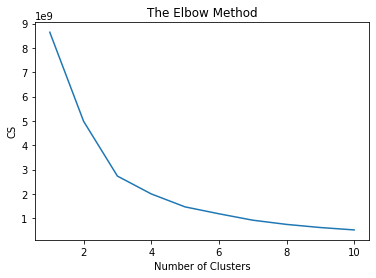

In [ ]:
# Optimasi K-Means dengan metode elbow untuk menentukan jumlah klaster yang tepat
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
# Proses K-Means Clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
dataWithoutLabels = dataset.loc[:,['num_reactions','num_comments']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()

array([0, 1])

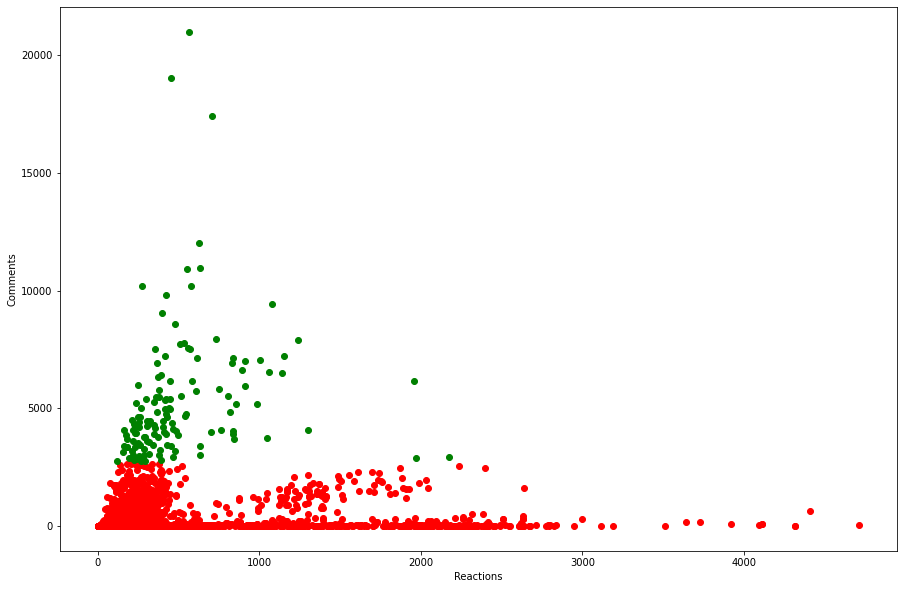

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["num_reactions"][dataWithoutLabels["type"] == 0], dataWithoutLabels["num_comments"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["num_reactions"][dataWithoutLabels["type"] == 1], dataWithoutLabels["num_comments"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.show()

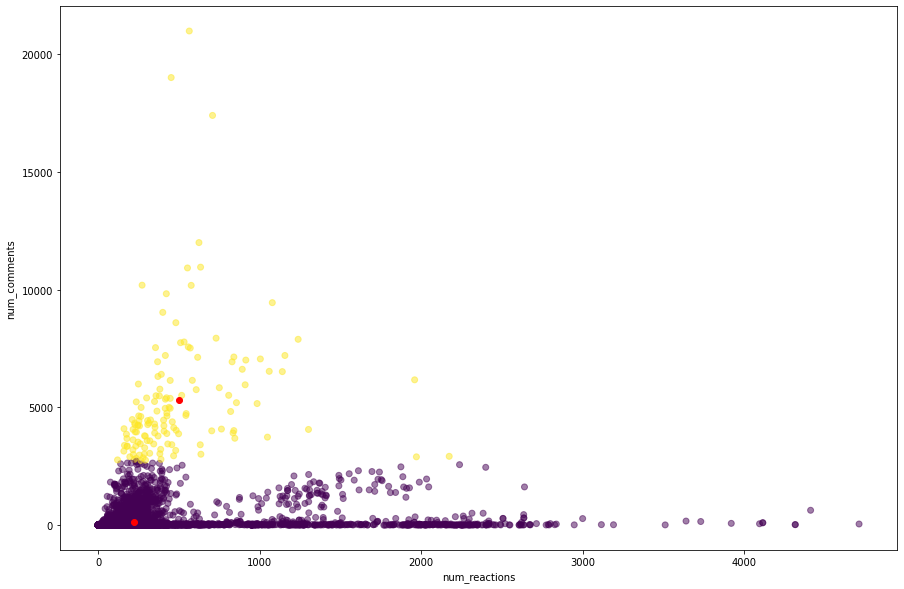

In [ ]:
# Data centroids middle of clustered scatters

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["num_reactions"], dataWithoutLabels["num_comments"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.show()